<a href="https://colab.research.google.com/github/negarhonarvar/SAT-optimized-solver/blob/main/Genetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_cnf_file(list_create):
   formula = []

   for i in range(4, len(list_create)):
    temp_list = list_create[i].split(' ')
    junk_list = []
    if len(formula) == 429:
      break
    for k in range(5):
      if(k % 2 == 0):
         num_int = temp_list[k]
         if int(num_int) < 0:
            junk_list.append( (abs(int(num_int)), 0) )
         elif int(num_int) > 0:
            junk_list.append( (int(num_int), 1) )
    formula.append(junk_list)
   return formula

In [3]:
def initialize(iteration_numbers):
   samples_list = []
   for i in range(iteration_numbers):
      junk_list = []
      for j in range(100):
         sign = random.randint(0,1)
         junk_list.append(sign)
      samples_list.append(junk_list)
   return samples_list

In [4]:
def number_of_trues(list_trues, sample):
    number_of_true = 0
    for i in range(len(sample)):
       for j in range(3):
          value = sample[i][j][0]
          sign = sample[i][j][1]
          sample_sign = list_trues[value - 1]
          if sign == 1:
           if sample_sign == 1 :
              number_of_true += 1
              break
          else:
           if sample_sign == 0 :
              number_of_true += 1
              break
    return number_of_true

In [5]:
def crossover(parents):
   childs = []
   flag = False
   parent_one = 0
   parent_two = 0
   while flag:
      parent_one = random.randint(0, 3)
      parent_two = random.randint(0, 3)
      if parent_one != parent_two:
         flag = True

   temp1 = parents[parent_one]
   temp2 =  parents[parent_two]

   parents.pop(parent_one)
   parents.pop(parent_two)

   crossover_points = random.randint(60, 95)
   for i in range(crossover_points, 100):
      temp = temp1[i]
      temp1[i] = temp2[i]
      temp2[i] = temp

   childs.append(temp1)
   childs.append(temp2)

   temp3 = parents[0]
   temp4 = parents[1]

   crossover_points = random.randint(60, 95)
   for i in range(crossover_points, 100):
      temp = temp3[i]
      temp3[i] = temp4[i]
      temp4[i] = temp

   childs.append(temp3)
   childs.append(temp4)

   parents.clear()

   return childs


In [6]:
def mutation(childs):
   random_bit = random.randint(0, 99)
   for i in range(len(childs)):
      if childs[i][random_bit] == 1:
         childs[i][random_bit] = 0
      else:
         childs[i][random_bit] = 1
   return childs

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


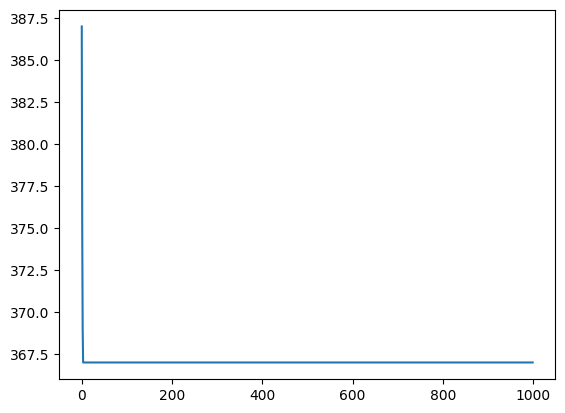

In [11]:
# reading from cnf file
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Colab Notebooks/Input.cnf'
#df = CNF(from_file=path)
#lists= df.clauses
read_f = open(path, 'r').read()
first_list = read_f.split("\n")
sample = read_cnf_file(first_list)

# creating 8 samples of 100 variables
data_list = initialize(8)

point_list = []
itr_list = []

trues_list = []
for i in range(8):
  trues_list.append(number_of_trues(data_list[i], sample))

itr_list.append(0)
point_list.append(max(trues_list))

for i in range(1, 1000):
   itr_list.append(i)
   trues_list = []
   parents = []
   for j in range(4):
      random_parent = random.randint(0, len(data_list) - 1)
      parents.append(data_list[random_parent])
      data_list.pop(random_parent)
   data_list.clear()
   for j in range(4):
      data_list.append(parents[j])

   childs__crossover_list = crossover(parents)

   childs_list = mutation(childs__crossover_list)

   for j in range(4):
      data_list.append(childs_list[j])

   for i in range(8):
       trues_list.append(number_of_trues(data_list[i], sample))

   point_list.append(max(trues_list))


plt.plot(itr_list, point_list)
plt.show()
